# Predict Health Outcomes of Horses

- https://www.kaggle.com/competitions/playground-series-s3e22

- The goal of this kaggle challenge is to predict the outcome of a horse based on 29 medical indicators which serve as the features for this machine learning task. The challenge uses synthetically generated data originally from the Horse Survival Dataset with both categorical and numerical variables. Because the target variable is the outcome of the horse (lived, died, euthanized) with the training data being labeled, this is a supervised classification (multiclass) machine learning task.

# Data Loading and Initial Look

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Shell command
!head -1 'Horse Health'/train.csv

id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome


In [3]:
# Loading data
df = pd.read_csv('Horse Health/train.csv')
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
# Counting rows (number of observations)
print(f'Number of rows: {len(df)}')

Number of rows: 1235


In [5]:
# Missing values
print(f'Number of missing values: {df.isnull().sum().sum()}')

Number of missing values: 0


In [6]:
# Displaying target variable outcomes
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [7]:
# Displaying shape of dataframe (1235 rows, 29 columns)
df.shape

(1235, 29)

In [8]:
# Testing printing features (.select_dtypes)
df.select_dtypes(include='number').columns

Index(['id', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [9]:
# Modules
from IPython.display import HTML, display
from tabulate import tabulate

In [10]:
# Making table with details of each feature
from tabulate import tabulate

feature_list = list()

for i in df.columns:
    # 1. Initializing list with column name
    feature = list()
    feature.append(i)
    
    # 2. Checking if feature is categorical or numerical
    type_data = type(df[i][0])
    feature.append(type_data)
    
    # 3. Checking values (numerical, categorical)
    if isinstance(df[i][0],np.integer) or isinstance(df[i][0],float):
        values = df[i].max() - df[i].min()
    if isinstance(df[i][0],str):
        values = df[i].nunique()
    feature.append(values)
    
    # 4. Checking missing values
    missing = df[i].isnull().sum()
    feature.append(missing)
    
    # Finally adding iteration of feature to feature_list
    feature_list.append(feature)

table = pd.DataFrame(feature_list, columns=['Name','Type','Values','N_Missing'])
table

,Name,Type,Values,N_Missing
0,id,<class 'numpy.int64'>,1234.0,0
1,surgery,<class 'str'>,2.0,0
2,age,<class 'str'>,2.0,0
3,hospital_number,<class 'numpy.int64'>,4783730.0,0
4,rectal_temp,<class 'numpy.float64'>,5.4,0
5,pulse,<class 'numpy.float64'>,154.0,0
6,respiratory_rate,<class 'numpy.float64'>,88.0,0
7,temp_of_extremities,<class 'str'>,5.0,0
8,peripheral_pulse,<class 'str'>,5.0,0
9,mucous_membrane,<class 'str'>,7.0,0


In [11]:
# Descriptive statistics of numerical features
df.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [12]:
# Summary of dataframe (including if null values present and datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

# Data Visualization

In [13]:
# Importing modules
%matplotlib inline
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats

In [14]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


[]

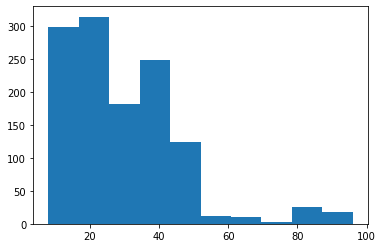

In [15]:
# Example of one histogram of one feature
plt.hist(df['respiratory_rate'])
plt.plot()

In [16]:
### Start with function to count data between classes

def count_data(data):
    
    # Dividing data between classes (local variables)
    df_0 = df[df['outcome']=='died']
    df_1 = df[df['outcome']=='euthanized']
    df_2 = df[df['outcome']=='lived']
    
    print('Number died:',df_0.shape[0])
    print('Number euthanized',df_1.shape[0])
    print('Number lived',df_2.shape[0])

count_data(df)

Number died: 410
Number euthanized 251
Number lived 574


In [17]:
# Defining variables (global)
df_died = df[df['outcome']=='died']
df_euth = df[df['outcome']=='euthanized']
df_live = df[df['outcome']=='lived']

In [18]:
### Defining separate function to apply Kolmogorov-Smirnov Test
def compare_two_features(df1,df2):
    
    # Histogram of 29 features
    plt.figure(figsize=(50,50))
    
    for i,column in enumerate(df.columns):
        KS_test = scipy.stats.kstest(df1[column],df2[column]).statistic
        print(i,':',column,':','KS Distribution Similarity Test:', KS_test)
        
        plt.subplot(6,5,i+1)
        plt.title(str(KS_test))
        plt.hist(df1[column], bins=25, histtype='step', color='red', label='0', density=1, stacked=True)
        plt.hist(df2[column], bins=25, histtype='step', color='blue', label='1', density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
    plt.show()

The Kolmogorov-Smirnov test was applied to compare the distributions of these classes.

0 : id : KS Distribution Similarity Test: 0.09303135888501742
1 : surgery : KS Distribution Similarity Test: 0.1592334494773519
2 : age : KS Distribution Similarity Test: 0.10034843205574913
3 : hospital_number : KS Distribution Similarity Test: 0.12752613240418118
4 : rectal_temp : KS Distribution Similarity Test: 0.09965156794425087
5 : pulse : KS Distribution Similarity Test: 0.41149825783972127
6 : respiratory_rate : KS Distribution Similarity Test: 0.26445993031358883
7 : temp_of_extremities : KS Distribution Similarity Test: 0.2634146341463415
8 : peripheral_pulse : KS Distribution Similarity Test: 0.313588850174216
9 : mucous_membrane : KS Distribution Similarity Test: 0.15331010452961671
10 : capillary_refill_time : KS Distribution Similarity Test: 0.2926829268292683
11 : pain : KS Distribution Similarity Test: 0.1686411149825784
12 : peristalsis : KS Distribution Similarity Test: 0.17770034843205576
13 : abdominal_distention : KS Distribution Similarity Test: 0.205574912891986

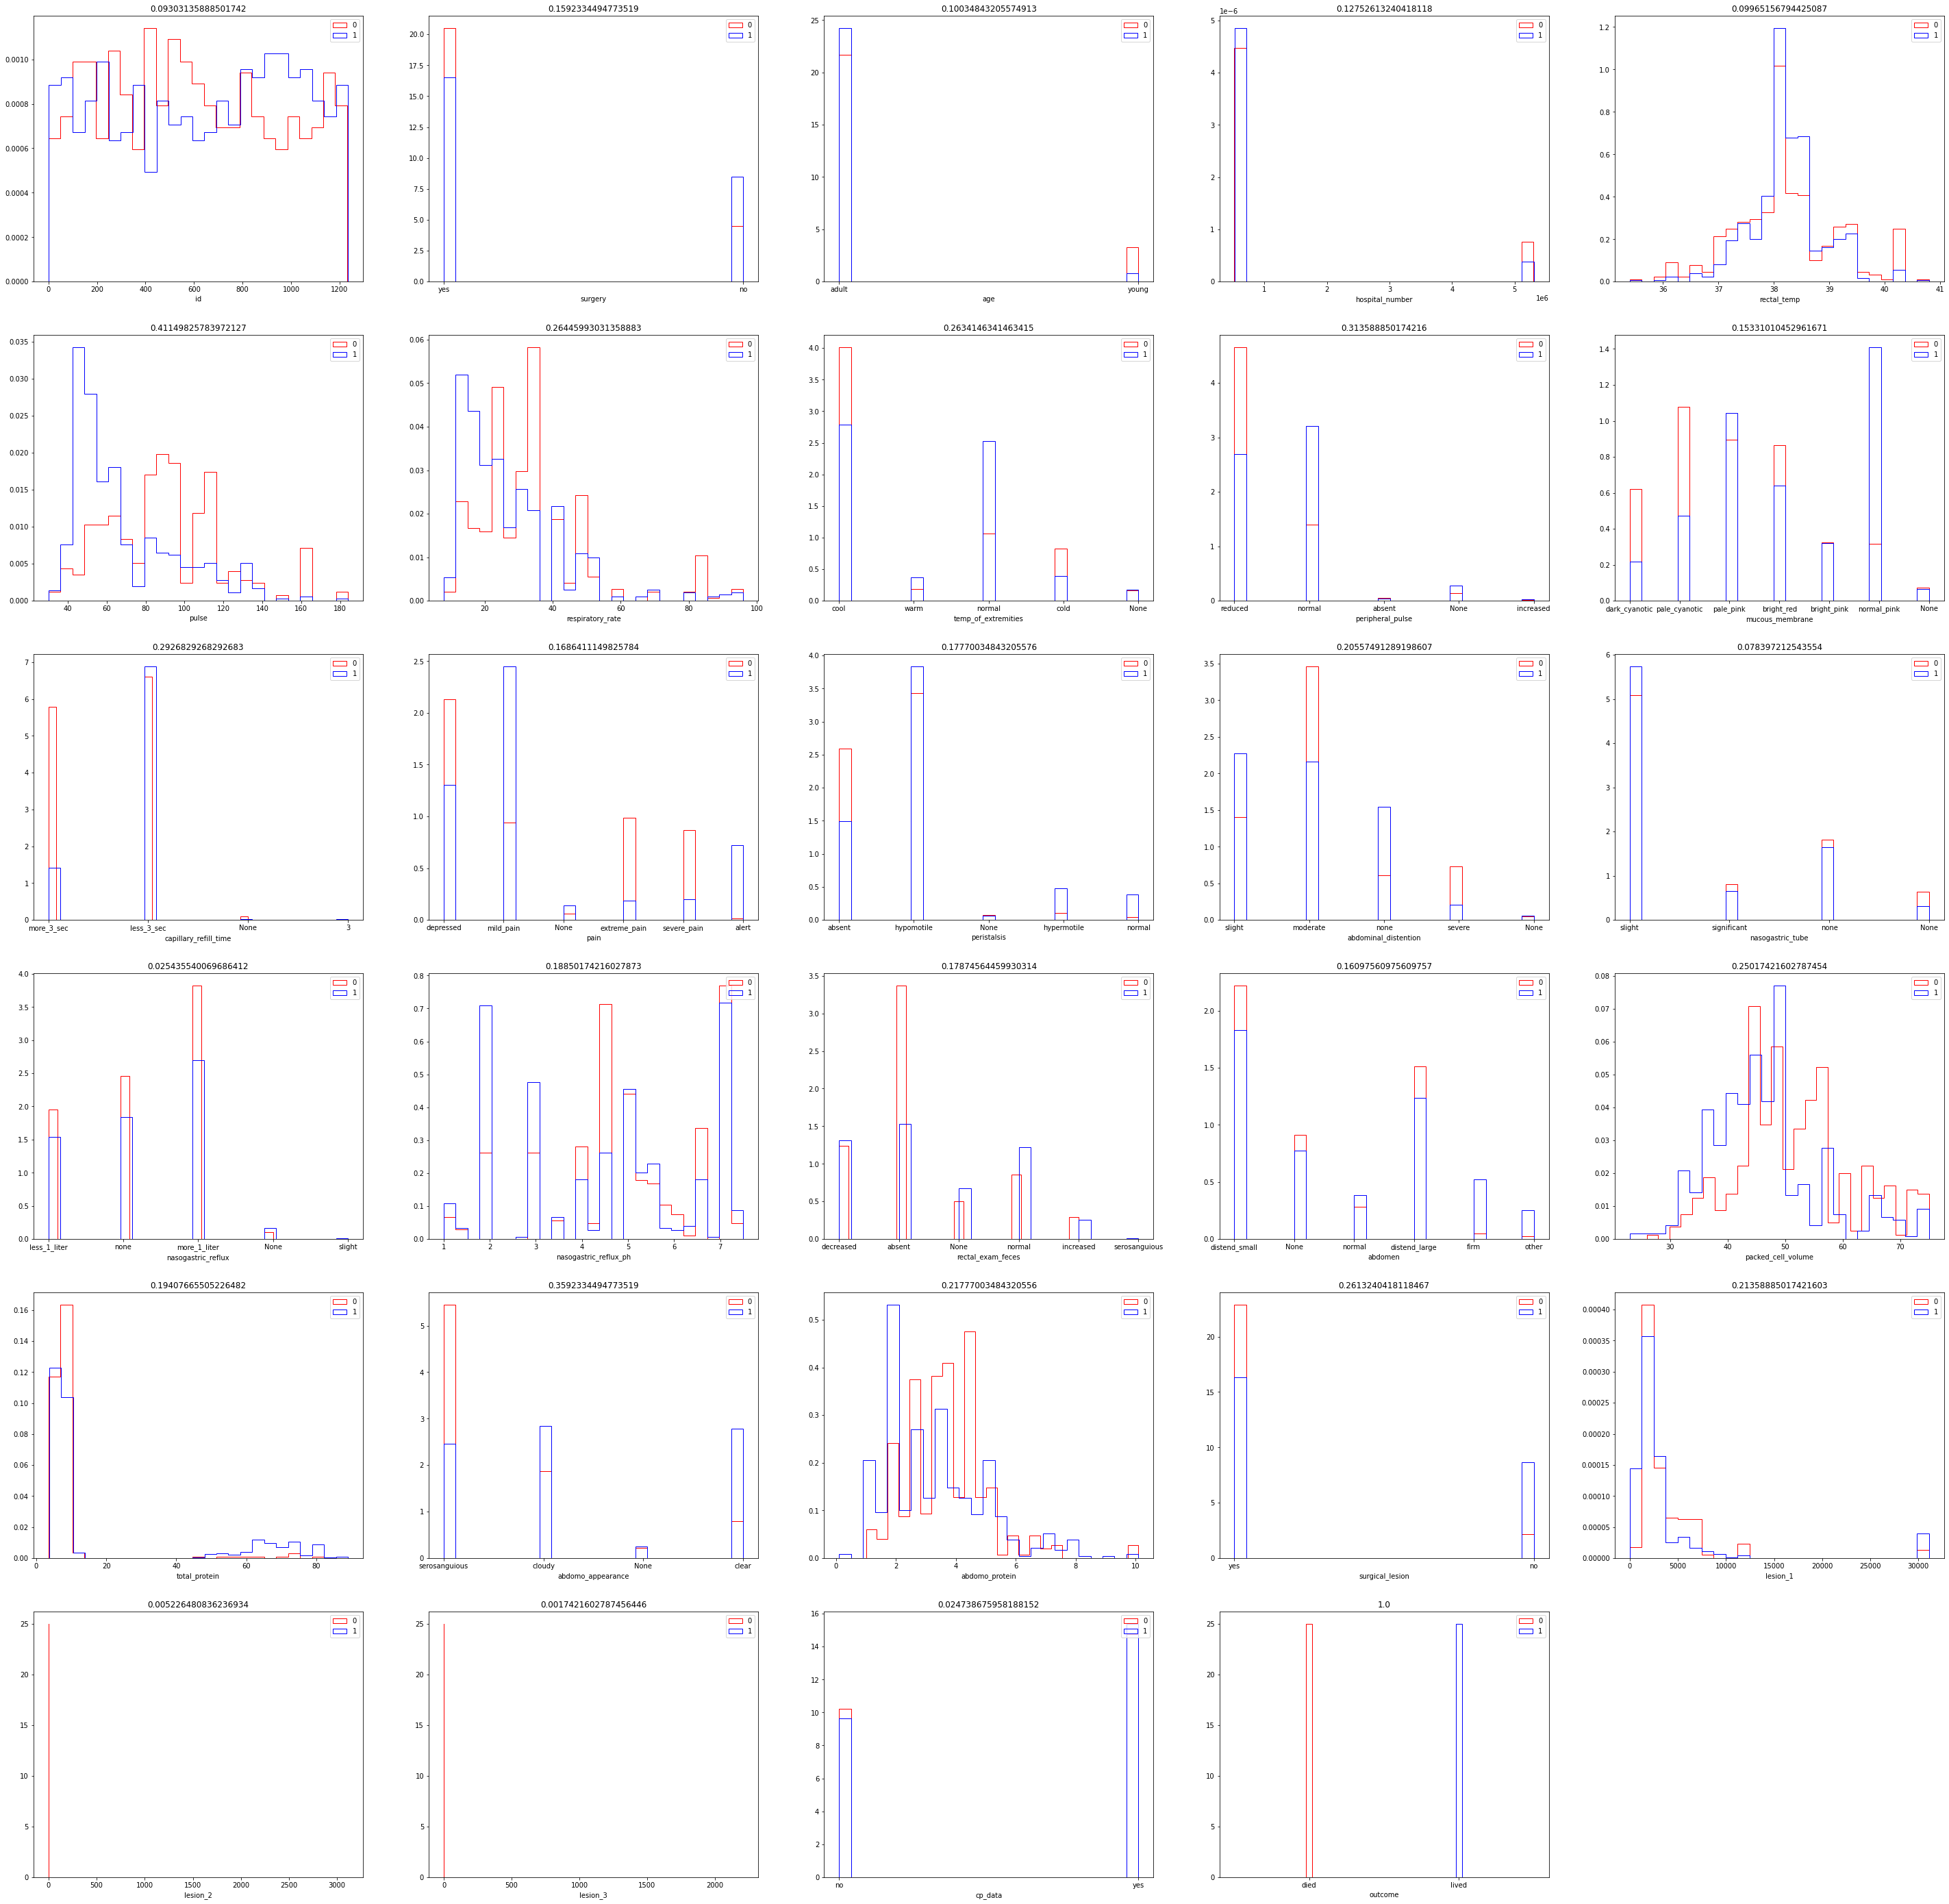

In [19]:
# Comparing died vs lived
compare_two_features(df_died,df_live)

A few significant features between horses who died vs lived:
- pulse (~0.411)
- peripheral_pulse (~0.314)
- capillary_refill_time (~0.293)

0 : id : KS Distribution Similarity Test: 0.045651540180740455
1 : surgery : KS Distribution Similarity Test: 0.13425323097852493
2 : age : KS Distribution Similarity Test: 0.11975512583811097
3 : hospital_number : KS Distribution Similarity Test: 0.4881838499659897
4 : rectal_temp : KS Distribution Similarity Test: 0.07282091147604704
5 : pulse : KS Distribution Similarity Test: 0.05877951608201341
6 : respiratory_rate : KS Distribution Similarity Test: 0.18490914391215627
7 : temp_of_extremities : KS Distribution Similarity Test: 0.09243027888446215
8 : peripheral_pulse : KS Distribution Similarity Test: 0.11814206588281022
9 : mucous_membrane : KS Distribution Similarity Test: 0.11257409386842872
10 : capillary_refill_time : KS Distribution Similarity Test: 0.04508794091924983
11 : pain : KS Distribution Similarity Test: 0.08895151102905452
12 : peristalsis : KS Distribution Similarity Test: 0.15882810222524535
13 : abdominal_distention : KS Distribution Similarity Test: 0.052443883

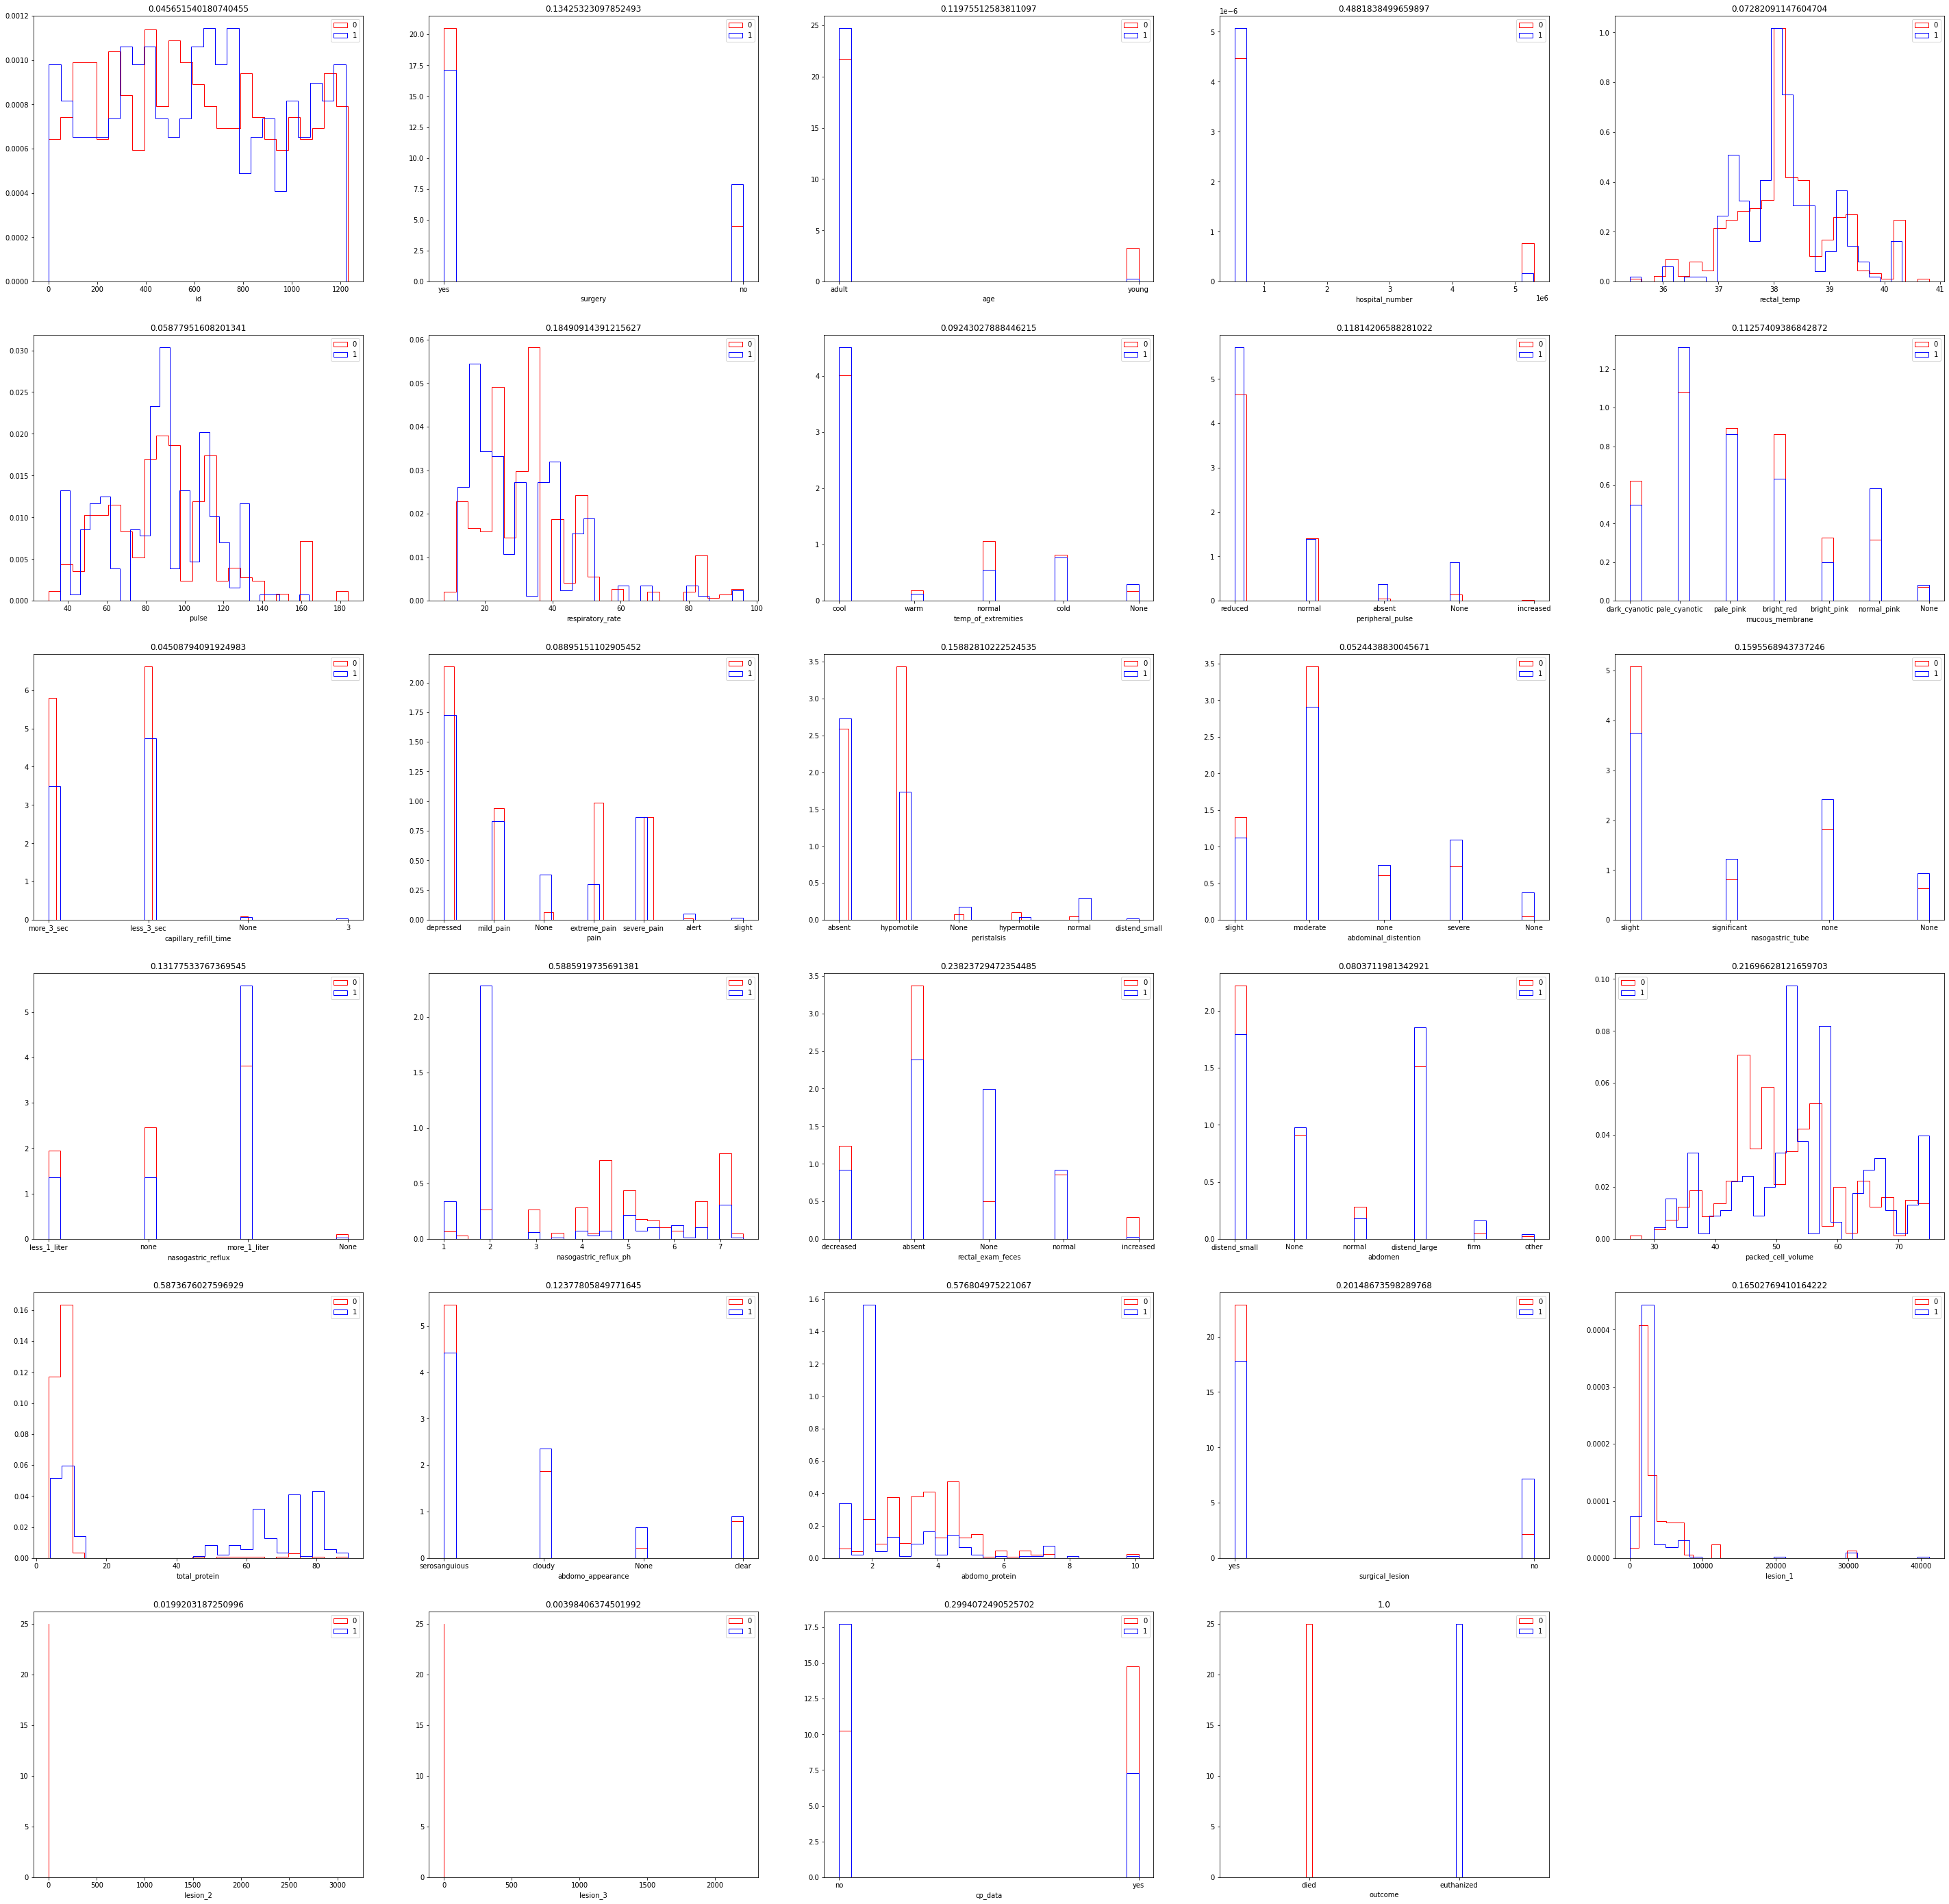

In [20]:
# Comparing died vs euthanized
compare_two_features(df_died,df_euth)

A few significant features between horses died vs euthanized:
- hospital_number (~0.488)
- nasogastric_reflux_ph (~0.589)
- total_protein (~0.587)
- abdomo_protein (~0.577)

0 : id : KS Distribution Similarity Test: 0.10263475713869262
1 : surgery : KS Distribution Similarity Test: 0.024980218498826992
2 : age : KS Distribution Similarity Test: 0.01940669378236184
3 : hospital_number : KS Distribution Similarity Test: 0.37041381512278415
4 : rectal_temp : KS Distribution Similarity Test: 0.11099157377458806
5 : pulse : KS Distribution Similarity Test: 0.413509724169524
6 : respiratory_rate : KS Distribution Similarity Test: 0.11444118994405653
7 : temp_of_extremities : KS Distribution Similarity Test: 0.3558449130308036
8 : peripheral_pulse : KS Distribution Similarity Test: 0.25494537529325206
9 : mucous_membrane : KS Distribution Similarity Test: 0.15780085233976984
10 : capillary_refill_time : KS Distribution Similarity Test: 0.24759498591001847
11 : pain : KS Distribution Similarity Test: 0.17108569207490595
12 : peristalsis : KS Distribution Similarity Test: 0.3365284506573011
13 : abdominal_distention : KS Distribution Similarity Test: 0.184828629731

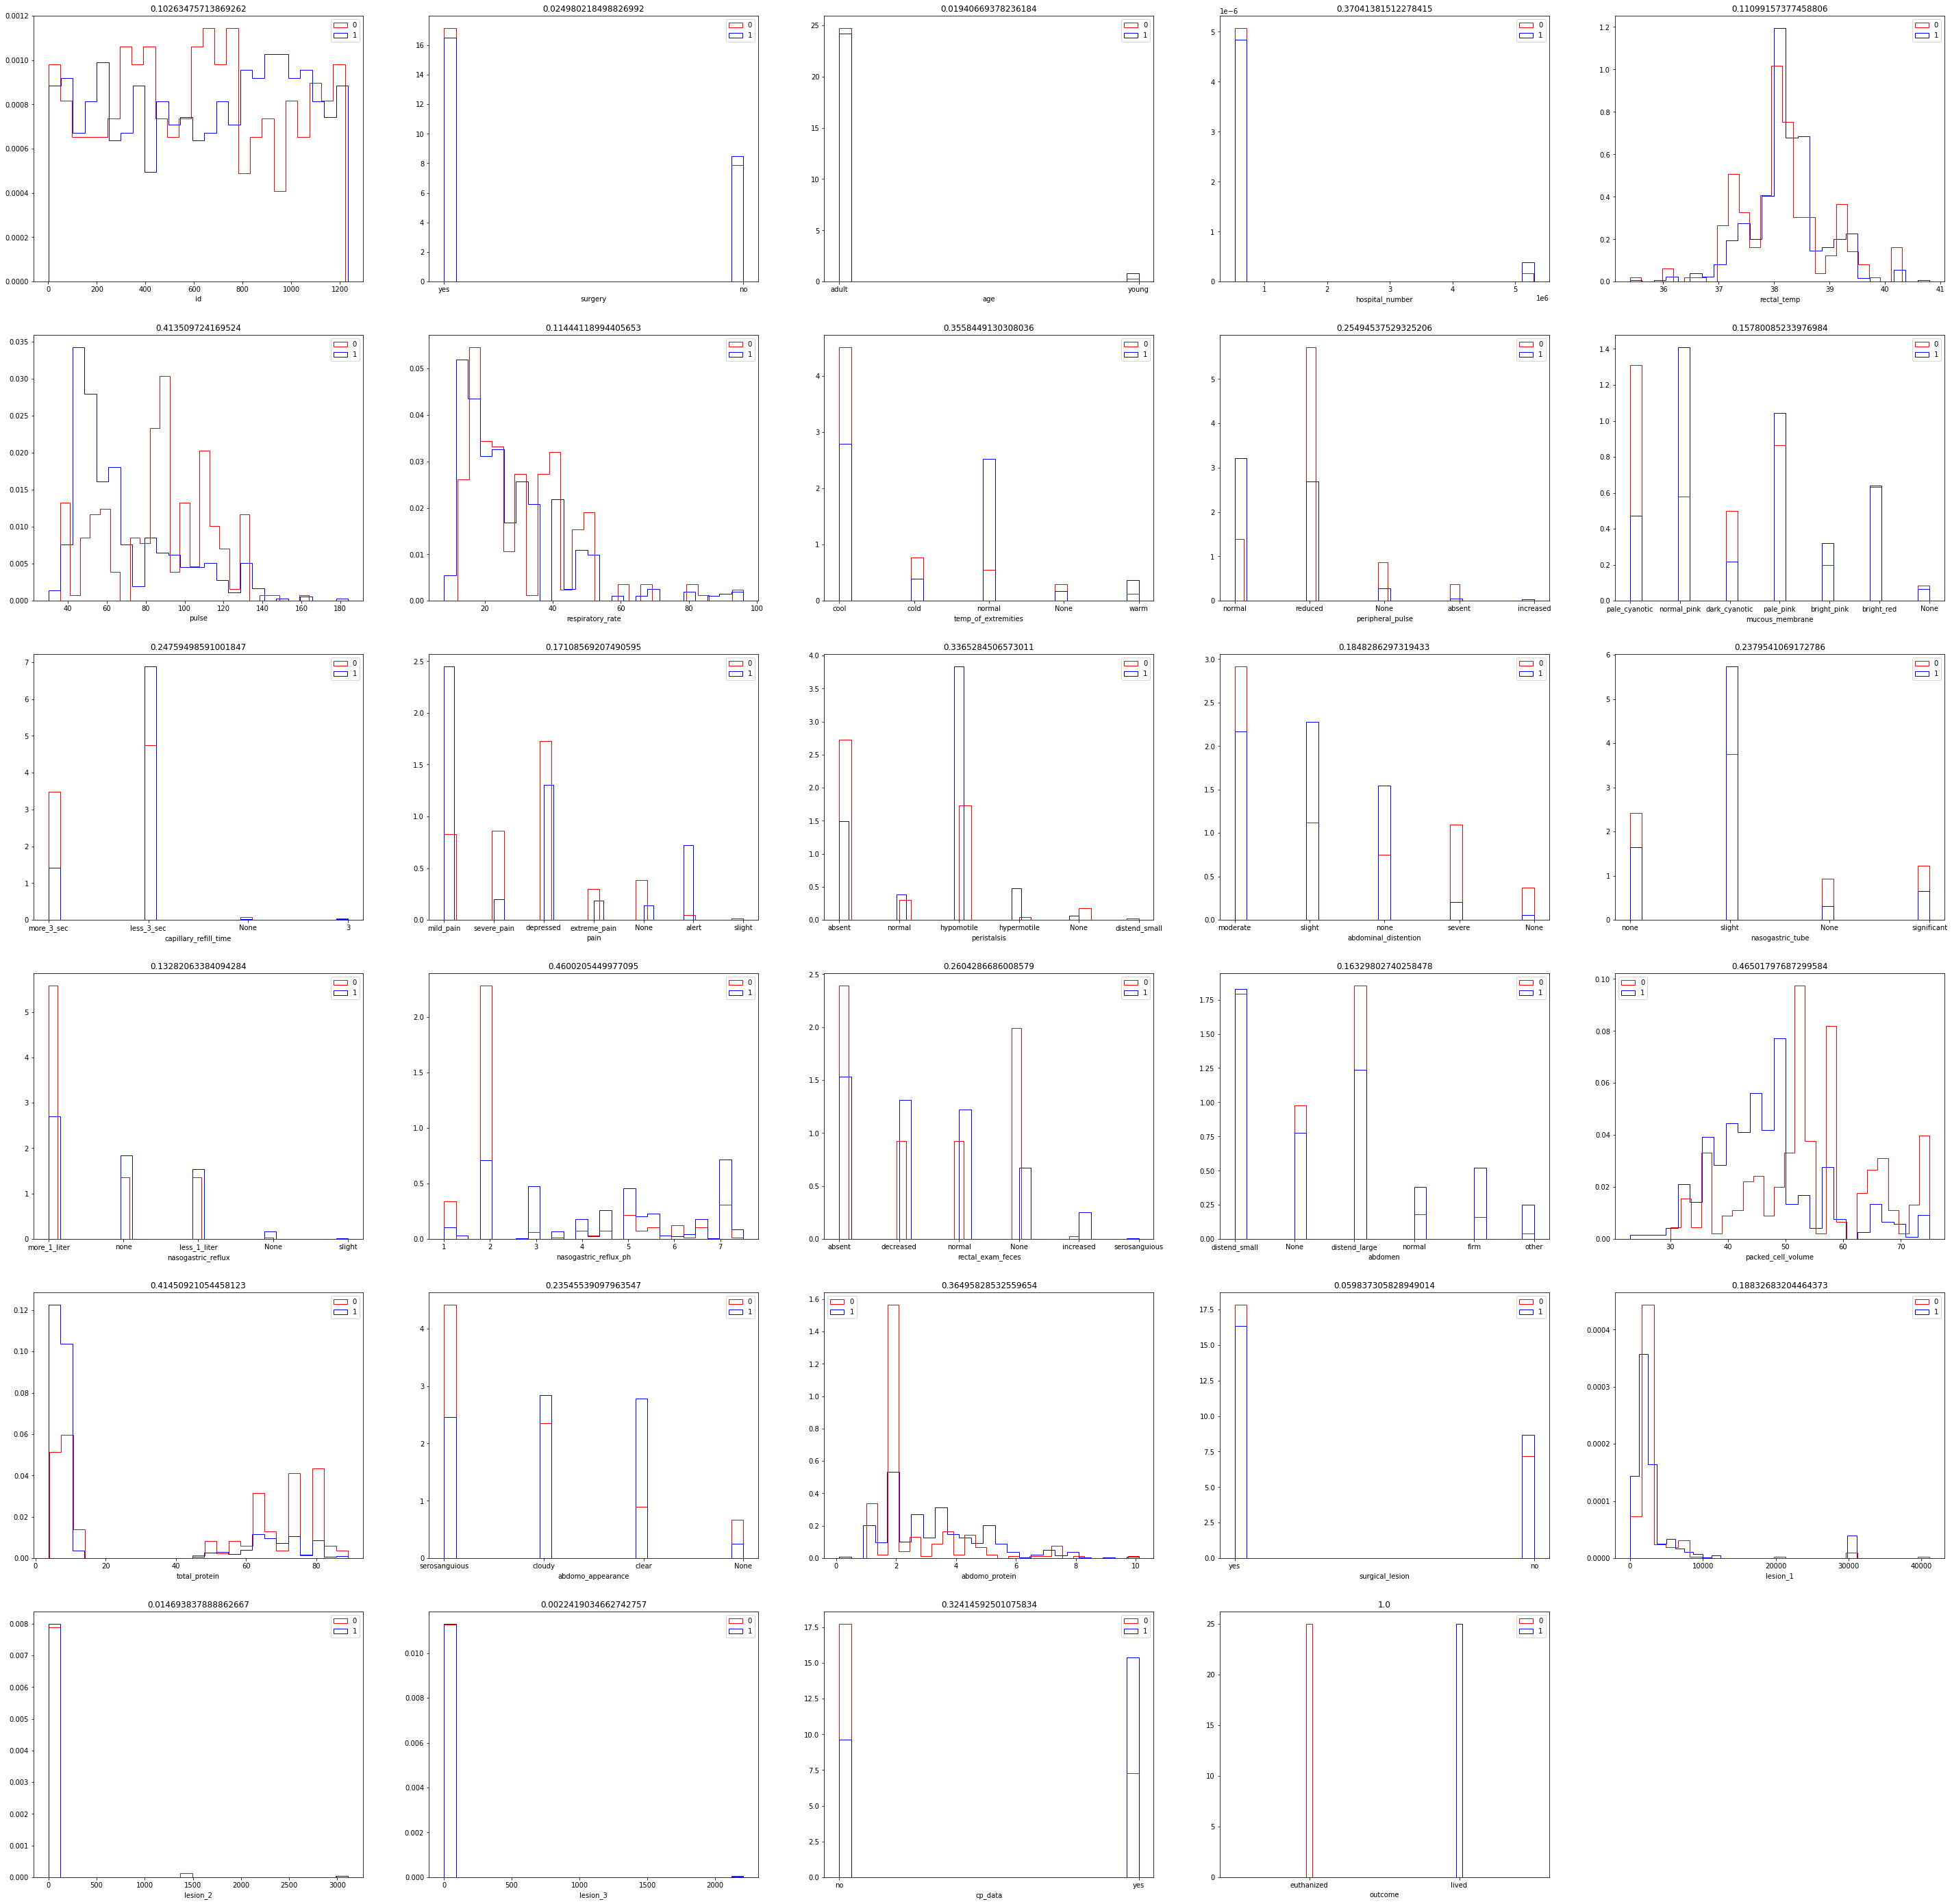

In [21]:
# Comparing euthanized vs lived
compare_two_features(df_euth,df_live)

A few significant features between horses euthanized vs lived:
- hospital number (~0.370)
- pulse (~0.414)
- packed_cell_volume (~0.465)

In [22]:
### Defining function for three histograms
def compare_three_features(df1,df2,df3):
    
    # Histogram of 29 features
    plt.figure(figsize=(50,50))
    
    for i,column in enumerate(df.columns):
        
        plt.subplot(6,5,i+1)
        plt.hist(df1[column], bins=25, histtype='step', color='red', label='0', density=1, stacked=True)
        plt.hist(df2[column], bins=25, histtype='step', color='blue', label='1', density=1, stacked=True)
        plt.hist(df3[column], bins=25, histtype='step', color='green', label='2', density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
    plt.show()

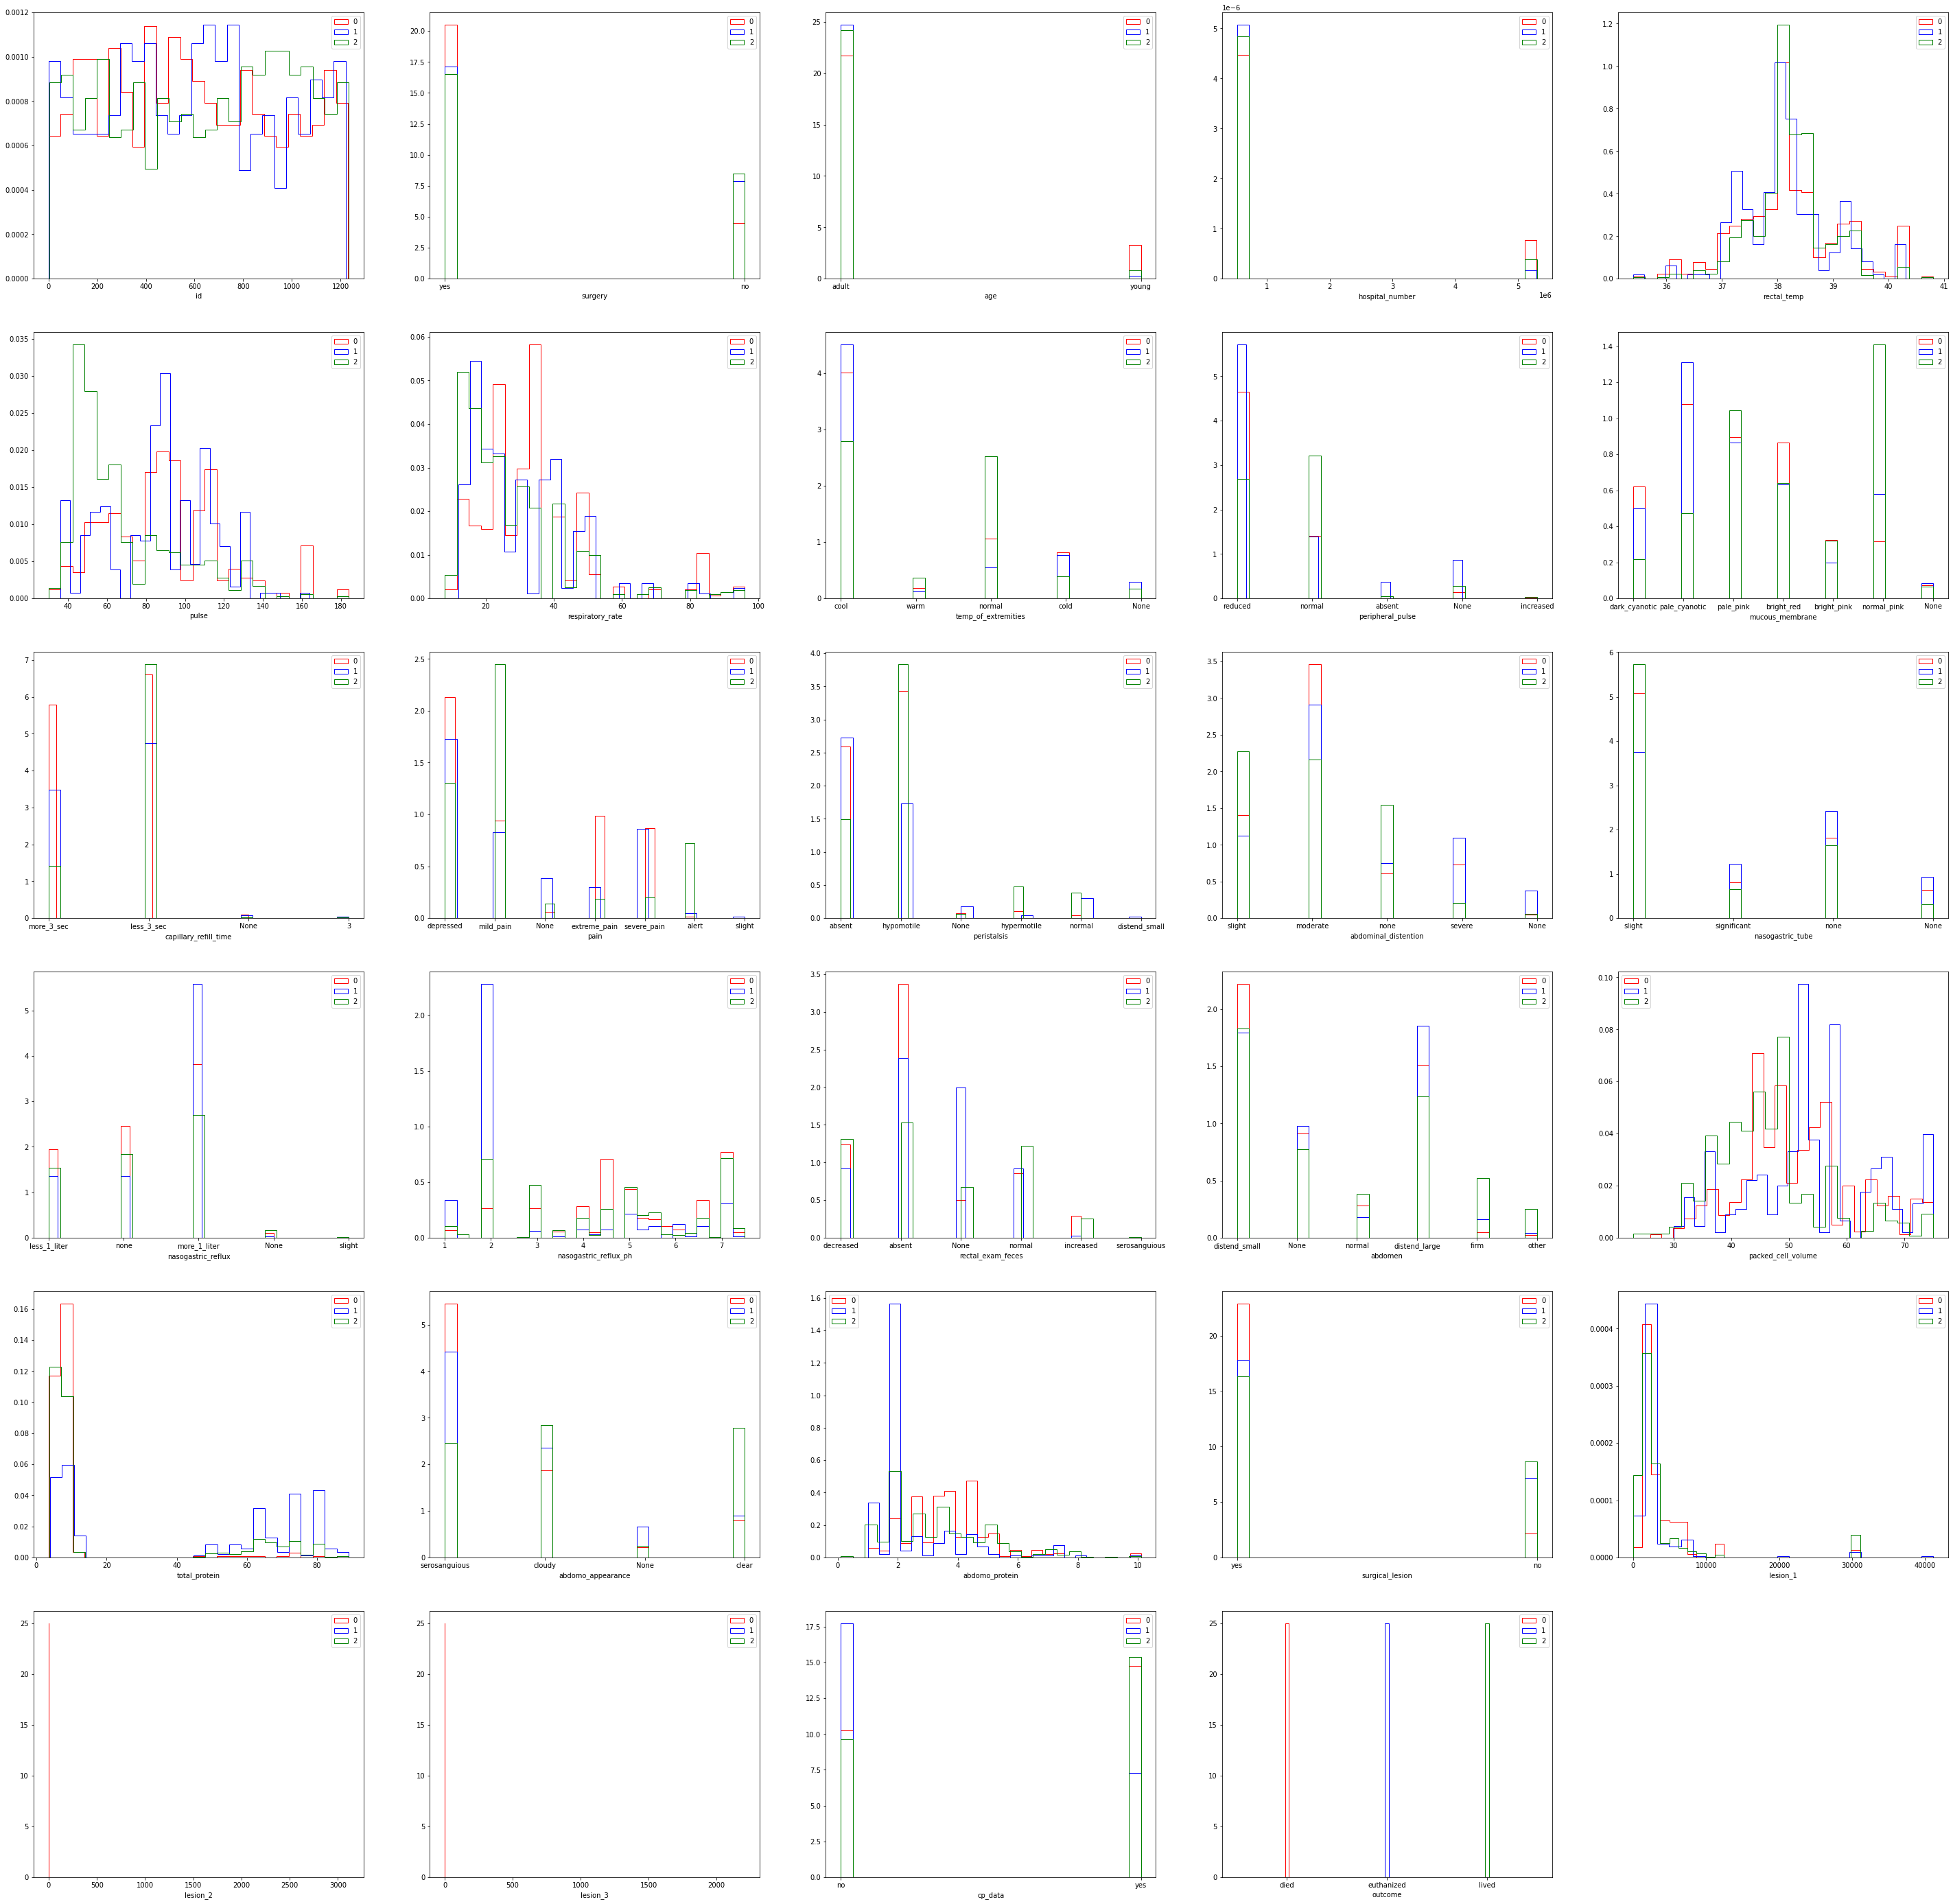

In [23]:
compare_three_features(df_died,df_euth,df_live)

### Categorical Features:

In [24]:
# Checking categorical features
df.select_dtypes(include='object').columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data', 'outcome'],
      dtype='object')

In [25]:
# Printing value counts
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print('\n')

yes    887
no     348
Name: surgery, dtype: int64


adult    1160
young      75
Name: age, dtype: int64


cool      700
normal    324
cold      121
warm       51
None       39
Name: temp_of_extremities, dtype: int64


reduced      724
normal       429
None          60
absent        18
increased      4
Name: peripheral_pulse, dtype: int64


pale_pink        284
normal_pink      260
pale_cyanotic    250
bright_red       211
dark_cyanotic    121
bright_pink       88
None              21
Name: mucous_membrane, dtype: int64


less_3_sec    834
more_3_sec    393
None            6
3               2
Name: capillary_refill_time, dtype: int64


depressed       429
mild_pain       408
severe_pain     146
extreme_pain    120
alert            87
None             44
slight            1
Name: pain, dtype: int64


hypomotile       664
absent           444
normal            53
hypermotile       53
None              20
distend_small      1
Name: peristalsis, dtype: int64


moderate    543
slight      34

In [26]:
# Printing percentages
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts()/len(df))
    print('\n')

yes    0.718219
no     0.281781
Name: surgery, dtype: float64


adult    0.939271
young    0.060729
Name: age, dtype: float64


cool      0.566802
normal    0.262348
cold      0.097976
warm      0.041296
None      0.031579
Name: temp_of_extremities, dtype: float64


reduced      0.586235
normal       0.347368
None         0.048583
absent       0.014575
increased    0.003239
Name: peripheral_pulse, dtype: float64


pale_pink        0.229960
normal_pink      0.210526
pale_cyanotic    0.202429
bright_red       0.170850
dark_cyanotic    0.097976
bright_pink      0.071255
None             0.017004
Name: mucous_membrane, dtype: float64


less_3_sec    0.675304
more_3_sec    0.318219
None          0.004858
3             0.001619
Name: capillary_refill_time, dtype: float64


depressed       0.347368
mild_pain       0.330364
severe_pain     0.118219
extreme_pain    0.097166
alert           0.070445
None            0.035628
slight          0.000810
Name: pain, dtype: float64


hypomotile       0

The features that look promising to explain the variation between classes (based on KS Statistic comparing two) include:
**pulse, peripheral_pulse, nasogastric_reflux_ph, total_protein, abdomo_protein,** and **packed_cell_volume**.

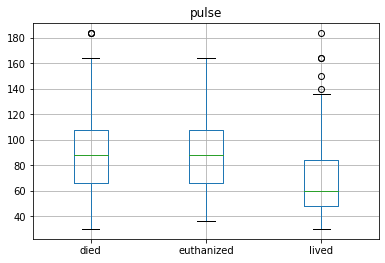

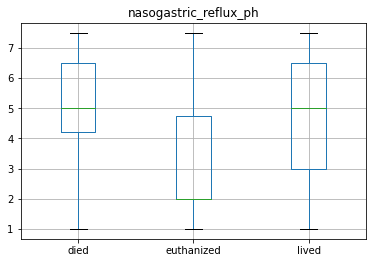

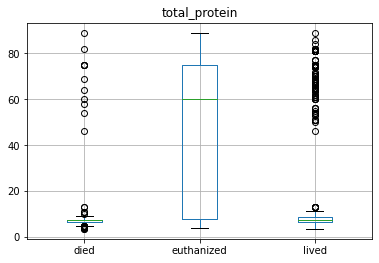

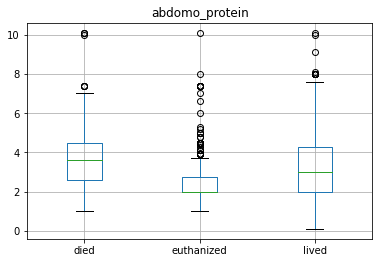

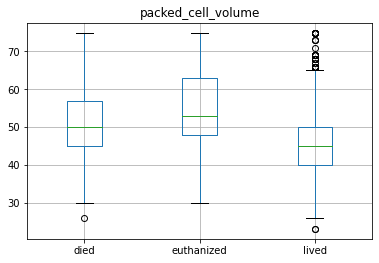

In [27]:
# Displaying boxplots for numerical features of interest
num_feat = ['pulse', 'nasogastric_reflux_ph', 'total_protein', 'abdomo_protein','packed_cell_volume']
for col in num_feat:
    df.boxplot(column=col,by='outcome')
    plt.suptitle('')
    plt.xlabel('')
    plt.title(col)
    plt.show()

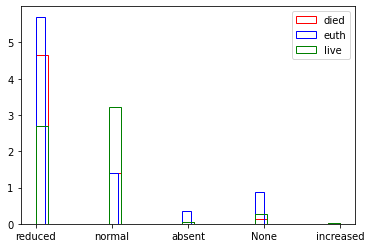

In [28]:
# peripheral_pulse (categorical)
plt.hist(df_died['peripheral_pulse'], bins=25, histtype='step', color='red', label='died', density=1, stacked=True)
plt.hist(df_euth['peripheral_pulse'], bins=25, histtype='step', color='blue', label='euth', density=1, stacked=True)
plt.hist(df_live['peripheral_pulse'], bins=25, histtype='step', color='green', label='live', density=1, stacked=True)
plt.legend()
plt.show()

### Correlations

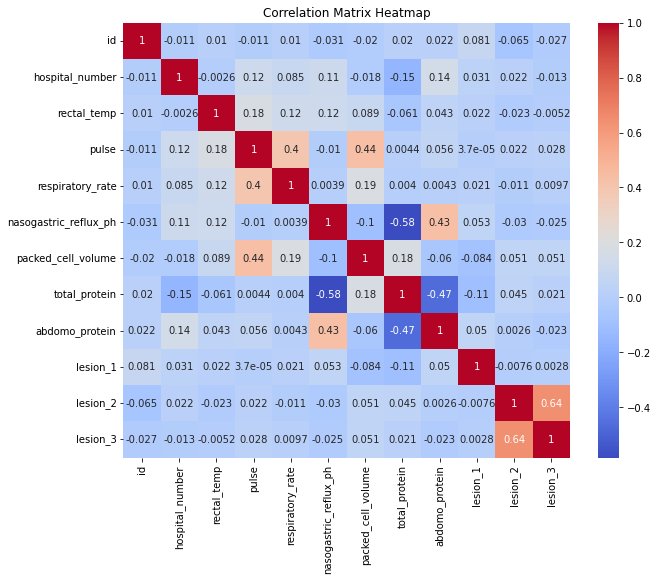

In [29]:
# Checking if there are positive or negative correlation between numeric variables
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Cleaning and Preparation for Machine Learning

The data cleaning I am going to perform includes normalization of the data (transforming the features to be on a scale from 0 to 1) in order for the numerical features to be on a similar scale and improve the performance of the machine learning model. I will also be using one-hot encoding for the categorical features.

In [30]:
# Normalizing numerical features
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical features
numerical_columns = df.select_dtypes(include='number').columns

# Apply Min-Max Scaling to numerical features (scale from 0 to 1)
scaler_minmax = MinMaxScaler()
df[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0.000000,yes,adult,0.001798,0.500000,0.662338,0.181818,cool,reduced,dark_cyanotic,...,0.653846,0.058480,serosanguious,0.33,yes,0.053734,0.0,0.0,no,died
1,0.000810,yes,adult,0.002600,0.388889,0.376623,0.045455,cool,normal,pale_cyanotic,...,0.192308,0.707602,serosanguious,0.19,yes,0.053710,0.0,0.0,no,euthanized
2,0.001621,yes,adult,0.001759,0.537037,0.584416,0.227273,cool,reduced,pale_pink,...,0.269231,0.033918,serosanguious,0.33,yes,0.124641,0.0,0.0,no,lived
3,0.002431,yes,adult,0.991097,0.314815,0.272727,0.250000,cold,reduced,pale_pink,...,0.576923,0.040936,cloudy,0.38,yes,0.053710,0.0,0.0,yes,lived
4,0.003241,no,adult,0.998850,0.481481,0.142857,0.454545,normal,normal,normal_pink,...,0.461538,0.044444,cloudy,0.25,no,0.000000,0.0,0.0,yes,lived


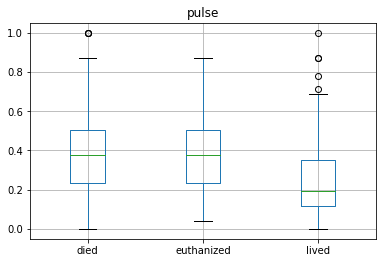

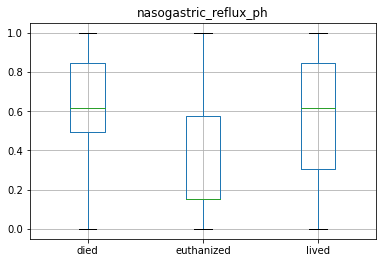

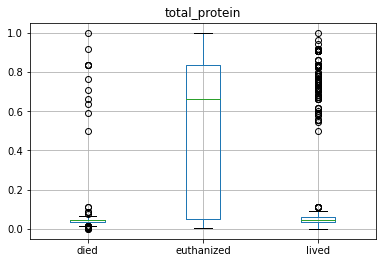

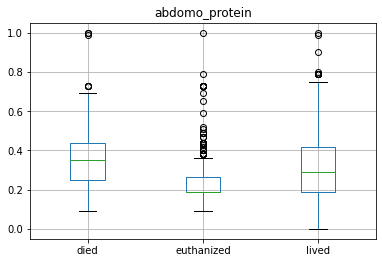

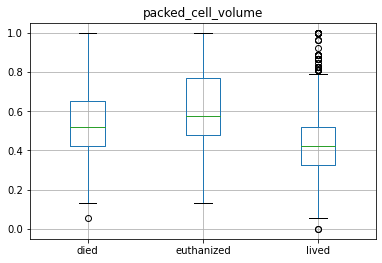

In [31]:
# Visualizing numerical features after rescaling
for col in num_feat:
    df.boxplot(column=col,by='outcome')
    plt.suptitle('')
    plt.xlabel('')
    plt.title(col)
    plt.show()

In [107]:
### One-hot encoding data
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical features (excluding target variable)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('outcome')

# Initialize OneHotEncoder and applying to data
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df[categorical_features])

# Create dataframe with one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate one-hot encoded dataframe with original dataframe
df_encoded = pd.concat((df, one_hot_df), axis=1)

# Dropping string categorical columns
df_encoded = df_encoded.drop(categorical_features, axis=1)

df_encoded

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,...,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,0.000000,0.001798,0.500000,0.662338,0.181818,0.846154,0.653846,0.058480,0.33,0.053734,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.000810,0.002600,0.388889,0.376623,0.045455,0.153846,0.192308,0.707602,0.19,0.053710,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.001621,0.001759,0.537037,0.584416,0.227273,0.384615,0.269231,0.033918,0.33,0.124641,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.002431,0.991097,0.314815,0.272727,0.250000,0.153846,0.576923,0.040936,0.38,0.053710,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.003241,0.998850,0.481481,0.142857,0.454545,0.923077,0.461538,0.044444,0.25,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0.996759,0.002895,0.574074,0.642857,0.454545,0.153846,0.653846,0.730994,0.19,0.053661,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1231,0.997569,0.001499,0.388889,0.194805,0.477273,0.307692,0.230769,0.033918,0.35,0.053734,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1232,0.998379,0.001732,0.388889,0.350649,0.363636,0.307692,0.326923,0.028070,0.69,0.009730,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1233,0.999190,0.002798,0.500000,0.259740,0.090909,0.153846,0.673077,0.824561,0.19,0.053734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [108]:
df_encoded.shape

(1235, 85)

# Machine Learning

### Problem Formulation

In [110]:
# Removing id columns
df_encoded.drop(['id','hospital_number'], axis=1, inplace=True)

In [111]:
# Properly encode target variable
df_encoded.replace({'outcome':{'died': 0, 'euthanized': 1, 'lived': 2}}, inplace=True)

In [120]:
# Split training sample into train and test sub-samples
from sklearn.model_selection import train_test_split

X = df_encoded.drop('outcome', axis=1)
y = df_encoded['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train ML Algorithm

In [121]:
### KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
# Predicting class labels from test dataset
y_pred = knn.predict(X_test)

#### **Evaluation Metrics**: 
* **Accuracy**:
    * Correct Predictions / Total Predictions
* **Precision**:
    * Correctly Predicted Positive / Total Predicted Positive
* **Recall**:
    * Correctly Predicted Positive / Actual Positive Observations
* **F1 Score**:
    * Weighted averaged of Precision and Recall
* **Area under the ROC curve**:
    * Measure of a model's ability to distinguish between positive and negative classes

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
accuracy_score(y_test, y_pred)

0.6396761133603239

In [138]:
# Defining function to compute accuracy
def accuracy(y_test, y_pred):
    
    # Initializing counter
    correct_predictions = 0
    
    # Counting correct predictions
    for yt, yp in zip(y_test, y_pred):
        if yt==yp:
            correct_predictions += 1
    
    # Returning accuracy
    return correct_predictions / len(y_test)

In [154]:
print('Accuracy:', accuracy(y_test, y_pred))

Accuracy: 0.6396761133603239


Precision for multiclass classification problem:
* **Macro-averaged precision:** calculated by taking precision for all classes, then averaging them
* **Micro-averaged precision:** calculate TP and FP by class, then compute precision

In [148]:
from sklearn.metrics import precision_score

In [155]:
# Macro-averaged precision
print('Macro-averaged precision:', precision_score(y_test, y_pred, average = 'macro'))

Macro-averaged precision 0.630817610062893


In [156]:
# Micro-averaged precision
print('Micro-averaged precision:', precision_score(y_test, y_pred, average = 'micro'))

Micro-averaged precision: 0.6396761133603239


Recall for multiclass classification problem:
* **Macro-averaged recall:** calculated by taking recall for all classes, then averaging them
* **Micro-averaged recall:** calculate TP and FN by class, then compute recall

In [161]:
# Computing additional evaluation metrics
from sklearn.metrics import recall_score

In [162]:
print('Macro-averaged recall:', recall_score(y_test, y_pred, average = 'macro'))

Macro-averaged recall: 0.6117783804726851


In [163]:
print('Micro-averaged recall:', recall_score(y_test, y_pred, average = 'micro'))

Micro-averaged recall: 0.6396761133603239


F1 Score for multiclass classification problem:
* **Macro-averaged F1 score:** calculated by taking F1 score for all classes, then averaging them
* **Micro-averaged F1 score:** calculated with the harmonic mean of macro-averaged precision and macro-averaged recall

In [164]:
from sklearn.metrics import f1_score

In [165]:
print('Macro-averaged F1 score:', f1_score(y_test, y_pred, average = 'macro'))

Macro-averaged F1 score: 0.6177618177618177


In [166]:
print('Micro-averaged F1 score:', f1_score(y_test, y_pred, average = 'micro'))

Micro-averaged F1 score: 0.6396761133603239


**Computing AUC score for multiclass classification problem:**
* Split the multi-class dataset into multiple binary classification problems. A binary classifier is trained on each problem

In [167]:
from sklearn.metrics import roc_auc_score

In [170]:
def roc_auc_score_multiclass(actual_class, pred_class):
    
    # creating a set of all unique classes
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for class_ in unique_class:
        
        # create a list of other classes
        other_class = [x for x in unique_class if x != class_]
        
        # marking current class as 1, other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]
        
        # using sklearn metrics to calculate score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average='macro')
        roc_auc_dict[class_] = roc_auc
        
    return roc_auc_dict

In [171]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{0: 0.6827264969421135, 1: 0.7158536585365853, 2: 0.7293366675440905}

In [174]:
from sklearn.metrics import confusion_matrix

{'outcome': {'died': 0, 'euthanized': 1, 'lived': 2}}


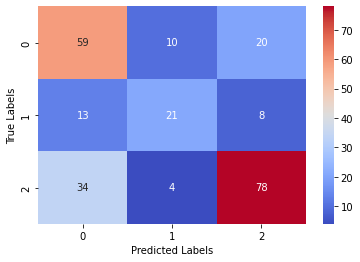

In [192]:
### Confusion matrix

# Printing encoded category key-value pairs
print({'outcome':{'died': 0, 'euthanized': 1, 'lived': 2}})

# Displaying heat map
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Applying ML to test dataset

In [258]:
# Loading testing dataset
df_test = pd.read_csv('Horse Health/test.csv')
df_test.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [259]:
### Data Preparation

# Selecting numerical features
numerical_columns_test = df_test.select_dtypes(include='number').columns

# Apply Min-Max Scaling to numerical features (scale from 0 to 1)
scaler_minmax = MinMaxScaler()
df_test[numerical_columns_test] = scaler_minmax.fit_transform(df_test[numerical_columns_test])

# Selecting categorical features (excluding target variable)
categorical_features_test = df_test.select_dtypes(include=['object']).columns.tolist()

# Initialize OneHotEncoder and applying to data
encoder = OneHotEncoder(sparse=False)
one_hot_encoded_test = encoder.fit_transform(df_test[categorical_features_test])

# Create dataframe with one-hot encoded columns
one_hot_df_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(categorical_features_test))

# Concatenate one-hot encoded dataframe with original dataframe
df_encoded_test = pd.concat((df_test, one_hot_df_test), axis=1)

# Dropping string categorical columns
df_encoded_test = df_encoded_test.drop(categorical_features_test, axis=1)

# Removing id columns
df_encoded_test.drop(['id','hospital_number'], axis=1, inplace=True)

df_encoded_test

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,...,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,0.541667,0.027027,0.126437,0.923077,0.365385,0.042303,0.22,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.458333,0.513514,0.448276,0.384615,0.403846,0.024677,0.25,0.070974,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.354167,0.202703,0.034483,0.307692,0.163462,0.024677,0.15,0.070878,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.229167,0.351351,0.126437,0.153846,1.000000,0.905993,0.09,0.045002,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.479167,0.094595,0.034483,0.307692,0.269231,0.034078,0.25,0.070974,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.895833,0.527027,0.310345,0.923077,0.653846,0.049354,0.44,0.103022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
820,0.250000,0.432432,0.126437,0.153846,0.519231,0.729730,0.19,0.071006,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
821,0.666667,0.648649,0.034483,0.846154,0.576923,0.043478,0.44,0.070878,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
822,0.479167,0.121622,0.655172,0.923077,0.500000,0.055229,0.49,0.100000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [260]:
len(X_train.columns)

82

In [261]:
len(df_encoded_test.columns)

79

In [262]:
# Taking note of features not in test dataset (outliers)
set(list(X_train.columns)) - set(list(df_encoded_test.columns))

{'nasogastric_reflux_slight',
 'pain_slight',
 'peristalsis_distend_small',
 'rectal_exam_feces_serosanguious'}

In [263]:
### Adding features to dataset with 0s for Kaggle Submission
df_encoded_test['nasogastric_reflux_slight'] = 0
df_encoded_test['pain_slight'] = 0
df_encoded_test['peristalsis_distend_small'] = 0

In [264]:
# Predicting outcome of horses on test dataset
y_pred_test = knn.predict(df_encoded_test)

/home/alex_nanez/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- pain_moderate
Feature names seen at fit time, yet now missing:
- rectal_exam_feces_serosanguious

  warnings.warn(message, FutureWarning)


In [193]:
# Loading sample_submission to check format
df_sub = pd.read_csv('Horse Health/sample_submission.csv')
df_sub.head()

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,lived
4,1239,lived


In [274]:
# Creating dataframe for Kaggle submission
outcome_test = pd.DataFrame(y_pred_test, columns=['outcome'])
submission = pd.concat((df_sub['id'], outcome_test), axis=1)
submission.replace({'outcome':{0: 'died', 1: 'euthanized', 2: 'lived'}}, inplace=True)
submission.head()

,id,outcome
0,1235,lived
1,1236,euthanized
2,1237,euthanized
3,1238,euthanized
4,1239,euthanized


In [276]:
# Creating csv file for Kaggle submission
submission.to_csv('Horse Health/submission.csv', index=False)